In [2]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
#Reading CSV's
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [5]:
#SalePrice Data Info
describe_train = train.SalePrice.describe()
describe_train

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Train skew:  1.8828757597682129


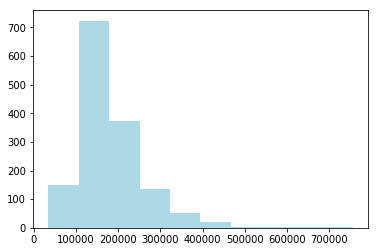

In [6]:
#Finding Train Skew
print ("Train skew: ", train.SalePrice.skew())
plt.hist(train.SalePrice, color='lightblue')
plt.show()

Target skew:  0.12133506220520406


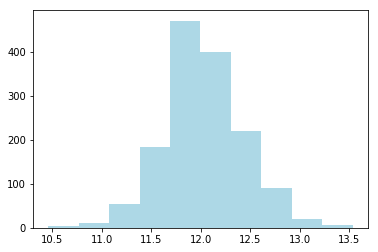

In [7]:
#Finding Target Skew
target = np.log(train.SalePrice)
print ("Target skew: ", target.skew())
plt.hist(target, color='lightblue')
plt.show()

In [8]:
#Finding Graph Correlations
numeric_features = train.select_dtypes(include=[np.number])
correlation = numeric_features.corr()
first_comparator = corr['SalePrice'].sort_values(ascending=False)[:5]
second_comparator = corr['SalePrice'].sort_values(ascending=False)[-5:]
print ("First values \n", first_comparator, "\n")
print ("Second values \n", second_comparator)

NameError: name 'corr' is not defined

In [ ]:
#Categories
categories = train.select_dtypes(exclude=[np.number])
print (categories.describe())

In [ ]:
#Removing Outliers from Selected Index
train = train[train['LotArea'] < 40000]
plt.scatter(x = train['LotArea'], y = np.log(train.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Neighborhood')
plt.show()

In [9]:
#Handling Nulls
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

              Null Count
Feature                 
PoolQC              1453
MiscFeature         1406
Alley               1369
Fence               1179
FireplaceQu          690
LotFrontage          259
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


In [19]:
#Interpolate missing data with an average value
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [20]:
#Linear Model, Splitting the Test Size For a More Accurate Prediction
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)
lr = linear_model.LinearRegression()

In [21]:
#Fitting the Linear Regression Model
lin_reg = lr.fit(X_train, y_train)

In [22]:
#Test
model = lin_reg.score(X_test, y_test)
model

0.8459557077107249

In [23]:
#Predictions, RMSE
y_pred = lin_reg.predict(X_test)
pred = mean_squared_error(y_test, y_pred)
pred

0.024474255952652787

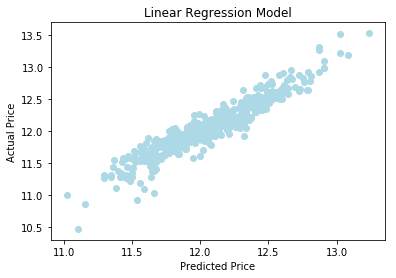

In [17]:
#Graphing the Model
val = y_test
plt.scatter(y_pred, val, color = 'lightblue')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [18]:
#Creating Final Predictions and the Data Frame to Submit
final = pd.DataFrame()
final['Id'] = test.Id
features = test.select_dtypes(include = [np.number]).drop(['Id'], axis = 1).interpolate()
predictions = lin_reg.predict(features)
final_predictions = np.exp(predictions)
print ("Original: ", predictions[:10], "\n")
print ("Final Predictions: ", final_predictions[:10])

Original:  [11.68310316 11.86410629 12.0232816  12.187169   12.11704712 12.07522839
 12.21118576 12.04927723 12.18860866 11.67454457] 

Final Predictions:  [118551.549062   142074.4213829  166588.43669992 196254.78189732
 182964.44488054 175470.882176   201025.24240713 170975.78649497
 196537.52552432 117541.24440768]


In [158]:
final['SalePrice'] = final_predictions
final.to_csv('Submission1.csv', index=False)
final

,Id,SalePrice
0,1461,122855.961495
1,1462,155875.253829
2,1463,174481.999033
3,1464,193089.709815
4,1465,181590.328472
5,1466,170529.119295
6,1467,185277.437482
7,1468,162494.996571
8,1469,191916.287052
9,1470,113790.709414
